# **Federal Emergency Management Agency (FEMA)**

## *Exploratory Data Analysis*

1. Comprension del Conjunto de Datos
2. Analisis Univariante
3. Analisis Multivariante
4. Limpieza y transformación de los datos
5. Hipotesis Estádisticas

### *1. Comprension del Conjunto de Datos*

FEMA es un conjunto de datos resumido que describe todos los desastres declarados a nivel federal. Este conjunto de datos enumera todas las Declaraciones Oficiales de Desastre de FEMA, comenzando con el primer registro en 1953, e incluye los tres tipos de declaraciones de desastre: desastre mayor, emergencia y asistencia para el manejo de incendios. El conjunto de datos incluye programas de recuperación declarados y áreas geográficas (el condado no está disponible antes de 1964; los registros de manejo de incendios se consideran parciales debido a la naturaleza histórica del conjunto de datos).

- **femaDeclarationString:** Agency standard method for uniquely identifying Stafford Act declarations - Concatenation of declaration type, disaster number and state code. Ex: DR-4393-NC

- **disasterNumber:** Sequentially assigned number used to designate an event or incident declared as a disaster.

- **state:** The name or phrase describing the U.S. state, district, or territory
- **declarationType:** Two character code that defines if this is a major disaster, fire management, or emergency declaration.
- **declarationDate:** Date the disaster was declared
- **fyDeclared:** Fiscal year in which the disaster was declared
- **incidentType:** Type of incident such as fire or flood. 
- **declarationTitle:** Title for the disaster
- **ihProgramDeclared:** Denotes whether the Individuals and Households program was declared for this disaster.
- **iaProgramDeclared:** Denotes whether the Individual Assistance program was declared for this disaster. 
- **paProgramDeclared:** Denotes whether the Public Assistance program was declared for this disaster.
- **hmProgramDeclared:** Denotes whether the Hazard Mitigation program was declared for this disaster.
- **incidentBeginDate:** Date the incident itself began
- **incidentEndDate:** Date the incident itself ended
- **disasterCloseoutDate:** Date all financial transactions for all programs are completed
- **fipsStateCode:** FIPS two-digit numeric code used to identify the United States, the District of Columbia, US territories, outlying areas of the US and freely associated states
- **fipsCountyCode:** FIPS three-digit numeric code used to identify counties and county equivalents in the United States, the District of Columbia, US territories, outlying areas of the US and freely associated states
- **placeCode:** A unique code system FEMA uses internally to recognize locations that takes the numbers '99' + the 3-digit county FIPS code.
- **designatedArea:** The name or phrase describing the geographic area that was included in the declaration
- **declarationRequestNumber:** Number assigned to the declaration request
- **lastIAFilingDate:** Last date when IA requests can be filed. Data available after 1998 only. The date only applies if IA has been approved for the disaster.
- **lastRefresh:** Date the record was last updated in the API data store
- **hash:** MD5 Hash of the fields and values of the record
- **id:** Unique ID assigned to the record



In [2]:
import pandas as pd
import numpy as np

import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

import us

from plotly.subplots import make_subplots
from geopy.geocoders import Nominatim

In [3]:
data = pd.read_csv('../files/DisasterDeclarationsSummaries.csv')
data.head()

,femaDeclarationString,disasterNumber,state,declarationType,declarationDate,fyDeclared,incidentType,declarationTitle,ihProgramDeclared,iaProgramDeclared,...,disasterCloseoutDate,fipsStateCode,fipsCountyCode,placeCode,designatedArea,declarationRequestNumber,lastIAFilingDate,lastRefresh,hash,id
0,FM-5457-OR,5457,OR,FM,2023-01-27T00:00:00.000Z,2023,Fire,CEDAR CREEK FIRE,False,False,...,NaN,41,39,99039,Lane (County),23009,NaN,2023-03-18T13:22:03.304Z,230fec119f882c28f1018bffe2b3d10dcc940c26,49440dd5-6591-4b32-b0ce-2298c56ec557
1,FM-5456-WA,5456,WA,FM,2022-10-17T00:00:00.000Z,2023,Fire,NAKIA CREEK FIRE,False,False,...,NaN,53,11,99011,Clark (County),22097,NaN,2023-03-18T13:22:03.304Z,78715856edcde8ba49b759d89933b25b4bb200e6,d3336e70-a497-4311-9e0d-55c51ba3fb1d
2,FM-5456-WA,5456,WA,FM,2022-10-17T00:00:00.000Z,2023,Fire,NAKIA CREEK FIRE,False,False,...,NaN,53,59,99059,Skamania (County),22097,NaN,2023-03-18T13:22:03.304Z,4a129aebbc92b695cdfed18144aa711c5c950058,5bb43a61-f3f3-4f16-9c33-2f4c8cb32b83
3,FM-5455-WA,5455,WA,FM,2022-09-10T00:00:00.000Z,2022,Fire,BOLT CREEK FIRE,False,False,...,NaN,53,33,99033,King (County),22083,NaN,2023-03-18T13:22:03.304Z,893a7fb7eded478ebb74d5f2cc5694946a95ab10,9c21dc79-7e0f-417c-804a-2cda09d1ca95
4,FM-5455-WA,5455,WA,FM,2022-09-10T00:00:00.000Z,2022,Fire,BOLT CREEK FIRE,False,False,...,NaN,53,61,99061,Snohomish (County),22083,NaN,2023-03-18T13:22:03.304Z,3c1fc234fc831a9b6be3e7b9ffdade9eaeb70b5b,be57ac19-25a1-455c-9077-250b9b31325b


In [4]:
print(f'El conjunto de datos presenta un tamaño de [{data.shape}] y una cantidad de duplicidades de {data.duplicated().sum()}.')  

El conjunto de datos presenta un tamaño de [(64285, 24)] y una cantidad de duplicidades de 0.


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64285 entries, 0 to 64284
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   femaDeclarationString     64285 non-null  object
 1   disasterNumber            64285 non-null  int64 
 2   state                     64285 non-null  object
 3   declarationType           64285 non-null  object
 4   declarationDate           64285 non-null  object
 5   fyDeclared                64285 non-null  int64 
 6   incidentType              64285 non-null  object
 7   declarationTitle          64285 non-null  object
 8   ihProgramDeclared         64285 non-null  bool  
 9   iaProgramDeclared         64285 non-null  bool  
 10  paProgramDeclared         64285 non-null  bool  
 11  hmProgramDeclared         64285 non-null  bool  
 12  incidentBeginDate         64285 non-null  object
 13  incidentEndDate           63701 non-null  object
 14  disasterCloseoutDate  

In [6]:
print(f'{data.describe()} \n\nAsí mismo, la cantidad de valores nulos es la siguiente: \n{data.isnull().sum()}')

       disasterNumber    fyDeclared  fipsStateCode  fipsCountyCode   
count    64285.000000  64285.000000   64285.000000    64285.000000  \
mean      2583.568842   2004.396018      31.578844       97.359104   
std       1408.379726     14.798339      16.629509      102.593807   
min          1.000000   1953.000000       1.000000        0.000000   
25%       1318.000000   1997.000000      19.000000       31.000000   
50%       3068.000000   2007.000000      30.000000       75.000000   
75%       3549.000000   2018.000000      46.000000      127.000000   
max       5464.000000   2023.000000      78.000000      840.000000   

          placeCode  declarationRequestNumber  
count  64285.000000              64285.000000  
mean   96379.707039              34989.910539  
std    13923.534419              34909.790916  
min        0.000000                  3.000000  
25%    99029.000000               8156.000000  
50%    99073.000000              20027.000000  
75%    99123.000000              

En primer lugar, es necesario realizar ciertas transofrmaciones de tipo de variable dentro de nuestro conjunto de datos

In [9]:
# Datetime

date_cols = data.filter(like='Date').columns.to_list()

for i in range(len(date_cols)):
    data[str(date_cols[i])] = pd.to_datetime(data[str(date_cols[i])])

Mediante un gráfico circular podemos tener una mejor representación de como se distribuyen los datos en referencia a unas variables clave

In [7]:
fig = px.sunburst(data, path=['declarationType','incidentType'], width=800, height=800,title='Clasificación de los registros de FEMA',color_discrete_sequence=px.colors.qualitative.Antique)
fig.show()

### *Analisis Univariante : IncidentType*

Primer vistazo a la variable de análisis y su comportamiento en el plano temporal

In [11]:

#Configuramos el Layout con 2 subplots y especificamos los tipos
fig = make_subplots(
    rows=2, 
    cols=1, 
    row_heights=[0.5, 0.7], 
    specs=[[{"type":"bar"}],
           [{"type":"scatter"}]]
)

#Primer Gráfico
fig.add_trace(
    go.Bar(x=data['incidentType'].value_counts().index,y=data['incidentType'].value_counts().values,name='Recuento'),
    row=1,col=1
)

#Segundo Gráfico:
data_timeline = data.groupby('declarationDate').size().reset_index(name='count')
data_timeline['year'] = data_timeline['declarationDate'].dt.date

fig.add_trace(
    go.Scatter(
    x=data_timeline['year'],
    y=data_timeline['count'],
    name='Timeline'
    ),
    row=2,col=1
)

#Configuración de Layout

fig.update_yaxes(title='Recuento')
fig.update_layout(title_text = 'Distribucion del tipo de Incidencia')

fig.update_layout(height=900, width=800)


fig.show()



Análisis de la misma variable en el plano espacial

In [25]:
data_location = data.groupby('state').size().reset_index(name='count')


fig = go.Figure(data=go.Choropleth(
    locations=data_location['state'],
    locationmode='USA-states',
    z=data_location['count'],
    colorscale='YlGnBu',
    colorbar_title='Values'
))

fig.update_layout(
    title_text='Distribucion Espacial',
    geo_scope='usa'
)
fig.update_layout(height=600, width=700)

fig.show()

Como principales conclusiones, podemos encontrar que:
- La causa principal de llamada de emergencia son los desastres naturales, en concreto: 'Several Storms', 'Hurricane' y 'Flood'
- La tendencia es constante prácticamente en el ultimo lustro a excepción de Marzo de 2020 donde encontramos un pico (Coincidencia temporal con Covid-19)
- En el plano espacial, se registra un mayor numero de incidencias en la parte sudeste del país, remarcado sobretodo en Texas 

### *Analisis Multivariante*

Ahora, nos interesa conocer la matriz de correlaciones de nuestro conjunto de datos. Para ello, eliminaremos de nuestro modelo para este ejercicio las variables que no sean relevantes de cara a un análisis y realizaremos transformacion a dummy de aquellas variables susceptibles de serlo. 

In [ ]:

#Eliminamos de las variables string las que no aplican de cara al análisis
deprecated_cols = ['femaDeclarationString','declarationTitle','designatedArea','lastRefresh', 'hash', 'id','state']

aux = data.select_dtypes(include=object)
aux = aux.drop(deprecated_cols, axis=1)

data_dummies = data.select_dtypes(include=['bool','int64','object'])
data_dummies = data_dummies.drop(deprecated_cols, axis=1)

col = list(aux.columns.values)

# #Transformamos a dummy 
data_dummies = pd.get_dummies(data_dummies, columns=col, drop_first=True)
data_dummies.head()


,disasterNumber,fyDeclared,ihProgramDeclared,iaProgramDeclared,paProgramDeclared,hmProgramDeclared,fipsStateCode,fipsCountyCode,placeCode,declarationRequestNumber,...,incidentType_Severe Storm,incidentType_Snowstorm,incidentType_Terrorist,incidentType_Tornado,incidentType_Toxic Substances,incidentType_Tropical Storm,incidentType_Tsunami,incidentType_Typhoon,incidentType_Volcanic Eruption,incidentType_Winter Storm
0,5457,2023,False,False,True,True,41,39,99039,23009,...,False,False,False,False,False,False,False,False,False,False
1,5456,2023,False,False,True,True,53,11,99011,22097,...,False,False,False,False,False,False,False,False,False,False
2,5456,2023,False,False,True,True,53,59,99059,22097,...,False,False,False,False,False,False,False,False,False,False
3,5455,2022,False,False,True,True,53,33,99033,22083,...,False,False,False,False,False,False,False,False,False,False
4,5455,2022,False,False,True,True,53,61,99061,22083,...,False,False,False,False,False,False,False,False,False,False


17


<Axes: >

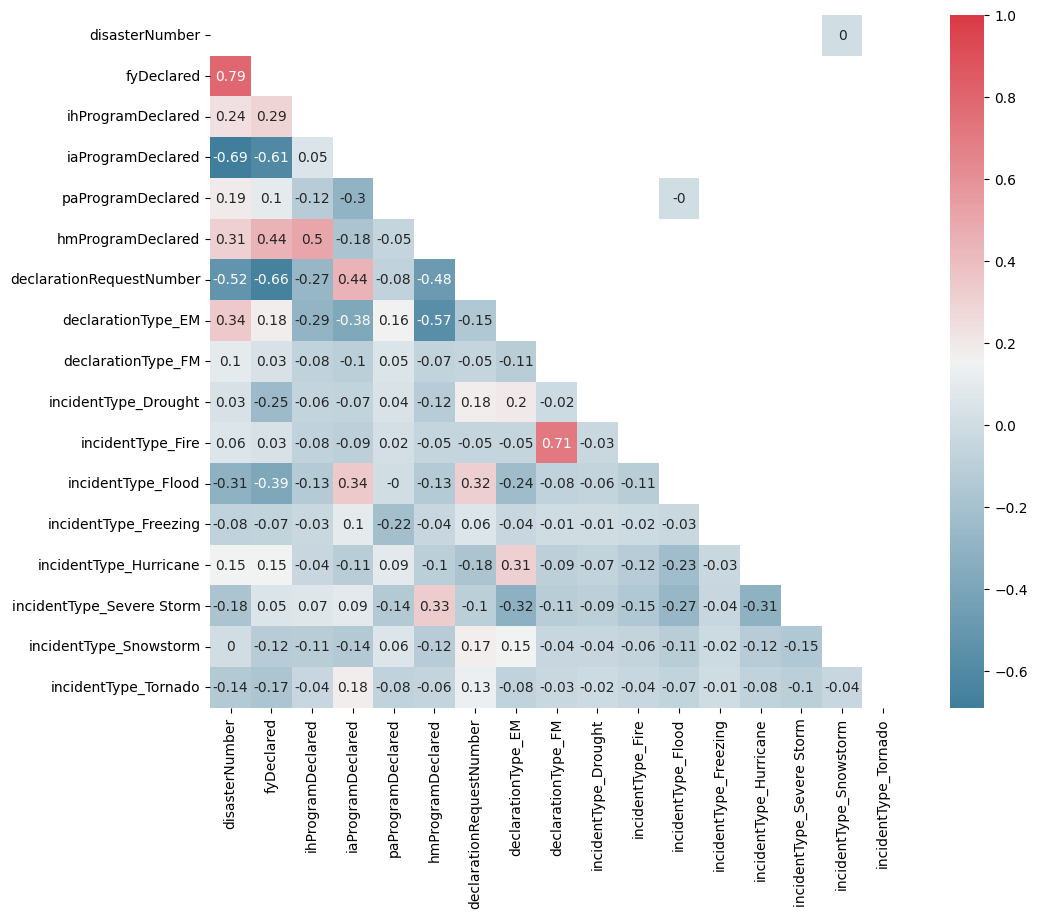

In [ ]:
#Matriz de correlacion auxiliar que nos ayudara a discriminar las variables que no usaremos
corrmat_aux = data_dummies.corr()
corrmat_aux = np.round(corrmat_aux,1)

#Eliminamos la diagonal principal
np.fill_diagonal(corrmat_aux.values,np.nan)


# Filtramos las columnas que tienen al menos un valor absoluto de coeficiente de correlación mayor que el umbral
columns_aux = []
umbral = 0.1 

for index, row in corrmat_aux.iterrows():
    if any(abs(val) > umbral for val in row):
        columns_aux.append(index)

print(len(columns_aux))

# Creamos una nueva matriz de correlación con las columnas seleccionadas
corrmat = data_dummies[columns_aux].corr()
corrmat = np.round(corrmat,2)

# Creamos una máscara triangular superior para visualizar solo la mitad de la matriz
mask = np.triu(corrmat)

# Creamos un gráfico de mapa de calor utilizando seaborn
cmap = sns.diverging_palette(230,10, as_cmap=True)

f, axs = plt.subplots(figsize=(12,9))
sns.heatmap(
    data=corrmat,
    vmax=1,
    mask=mask,
    cmap=cmap,
    square=True,
    annot=True,
)





